<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/titanic_transcription.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 로드 및 기본 설정

In [ ]:
#라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

#시각화를 위한 설정
plt.style.use('ggplot')
sns.set_theme(font_scale=2)
set_matplotlib_formats('svg')

#결측치를 보기 쉽게
import missingno as msno

#경고메시지를 무시
import warnings
warnings.filterwarnings('ignore')


#데이터 셋

In [456]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/Data/titanic/test.csv')

In [457]:
#데이터 미리보기
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#데이터 정보
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#데이터의 통계적 수치
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#df_train에 결측치 비율 확인
for col in df_train.columns:
  msg = 'column : {:>10}\t Percent of Nan value : {:.2f}'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

column : PassengerId	 Percent of Nan value : 0.00
column :   Survived	 Percent of Nan value : 0.00
column :     Pclass	 Percent of Nan value : 0.00
column :       Name	 Percent of Nan value : 0.00
column :        Sex	 Percent of Nan value : 0.00
column :        Age	 Percent of Nan value : 19.87
column :      SibSp	 Percent of Nan value : 0.00
column :      Parch	 Percent of Nan value : 0.00
column :     Ticket	 Percent of Nan value : 0.00
column :       Fare	 Percent of Nan value : 0.00
column :      Cabin	 Percent of Nan value : 77.10
column :   Embarked	 Percent of Nan value : 0.22


In [ ]:
#df_test에 결측치 비율 확인
for col in df_test.columns:
  msg = 'column : {:>10}\t Percent of Nan value : {:.2f}'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
  print(msg)

column : PassengerId	 Percent of Nan value : 0.00
column :     Pclass	 Percent of Nan value : 0.00
column :       Name	 Percent of Nan value : 0.00
column :        Sex	 Percent of Nan value : 0.00
column :        Age	 Percent of Nan value : 20.57
column :      SibSp	 Percent of Nan value : 0.00
column :      Parch	 Percent of Nan value : 0.00
column :     Ticket	 Percent of Nan value : 0.00
column :       Fare	 Percent of Nan value : 0.24
column :      Cabin	 Percent of Nan value : 78.23
column :   Embarked	 Percent of Nan value : 0.00


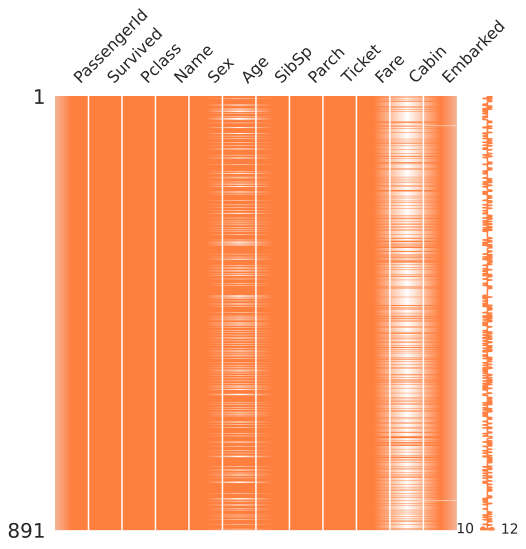

In [ ]:
#null데이터를 시각화
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8), color=(1,0.5,0.25))

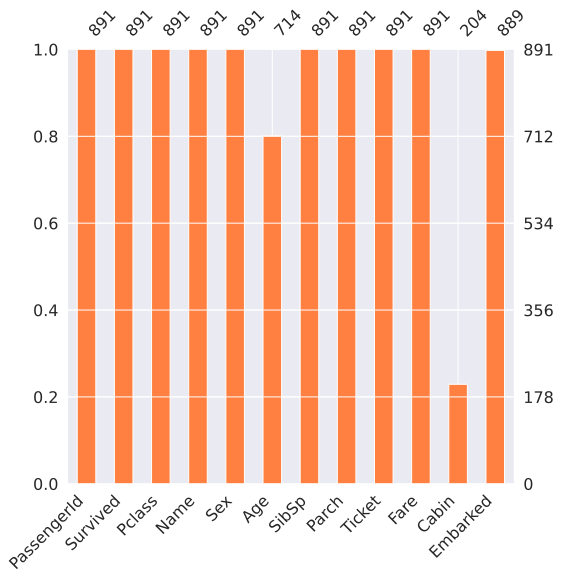

In [ ]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8), color=(1,0.5,0.25))

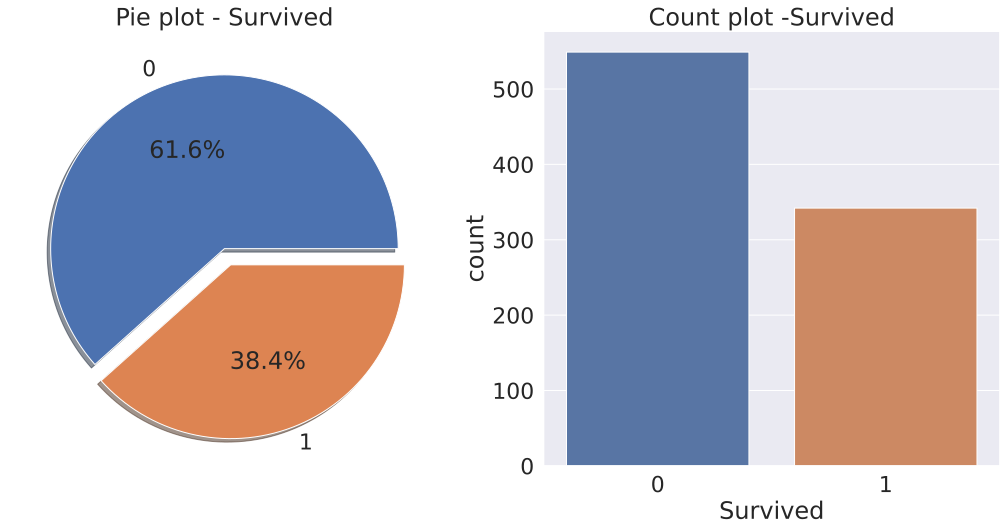

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title("Count plot -Survived")
plt.show()

#EDA

##Pclass

In [ ]:
df_train[["Pclass", 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df_train[["Pclass", 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


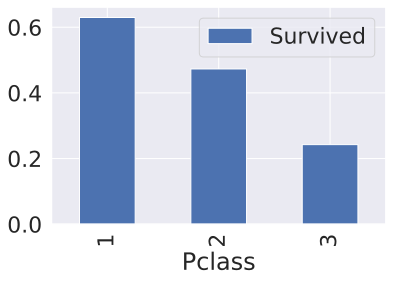

In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

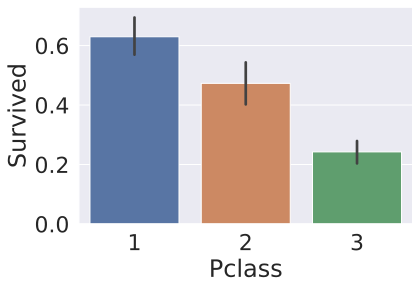

In [ ]:
sns.barplot(data=df_train, x='Pclass', y='Survived')

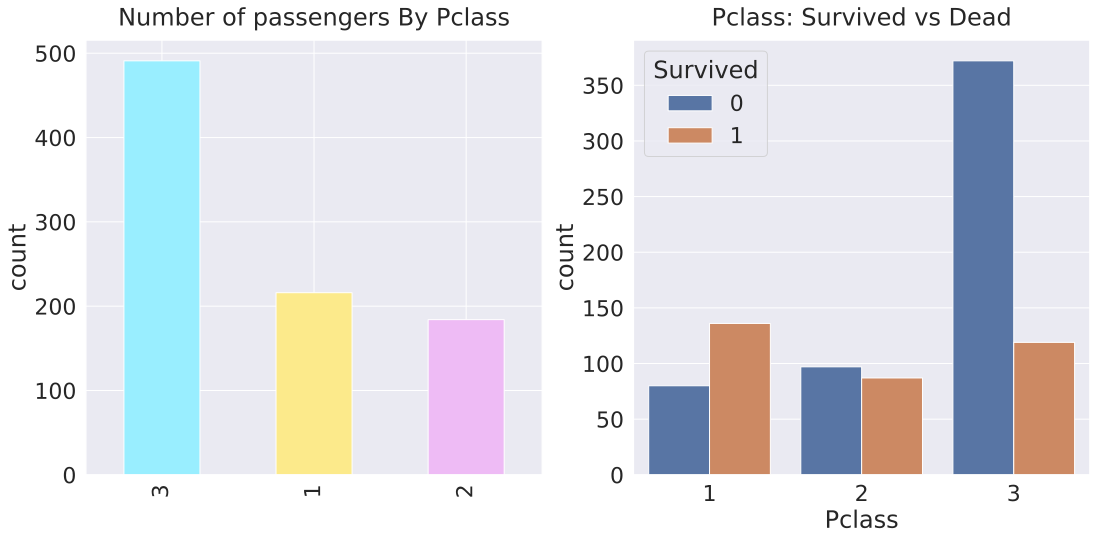

In [ ]:
y_position = 1.02
f, ax= plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0], color = ['#99eeff', '#fcea8b','#eebbf5'])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead',y=y_position)
plt.show()

##Sex

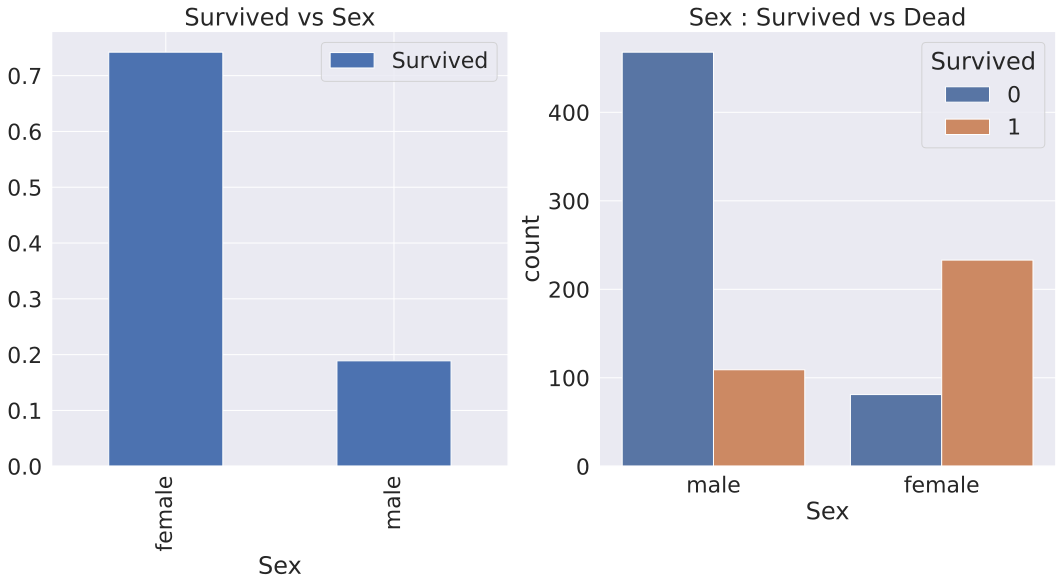

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
#sns.barplot(data=df_train, x='Sex', y='Survived', ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title("Sex : Survived vs Dead")

plt.show()

In [ ]:
pd.crosstab(index = df_train['Sex'], columns = df_train['Survived'], margins=True).style.background_gradient(cmap='Set2')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Both Sex and Pclass

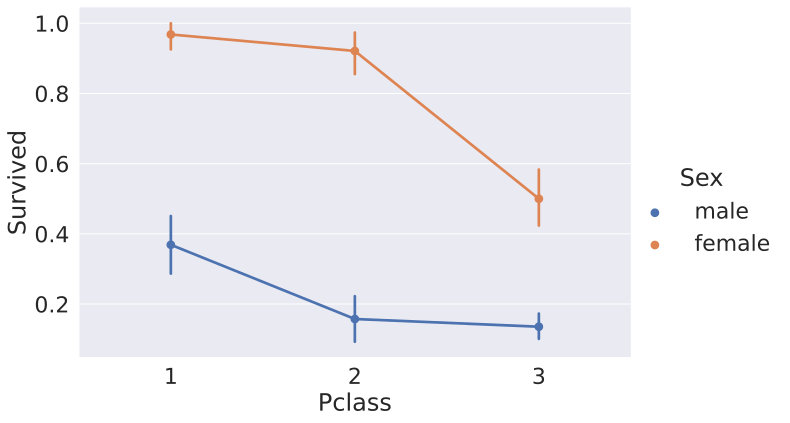

In [ ]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- Lady fisrt.
- Money brings survival?

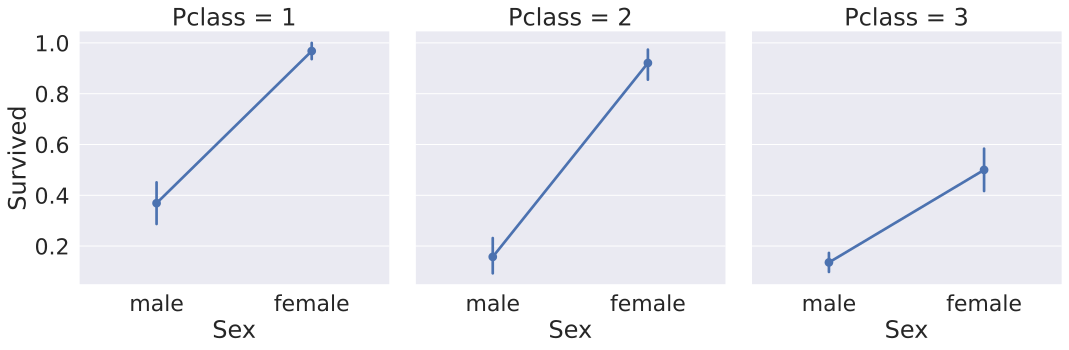

In [ ]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=.5)

##Age

In [ ]:
print("제일 나이 많은 탐승객 : {:.1f} years".format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탐승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


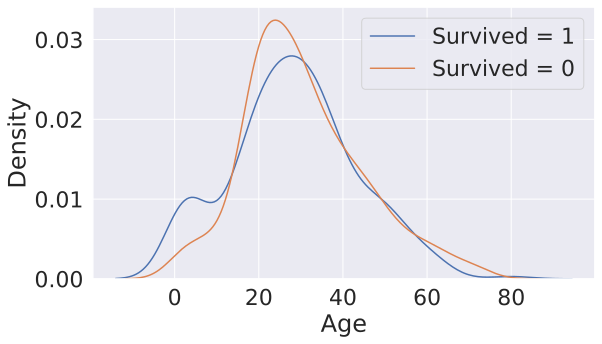

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

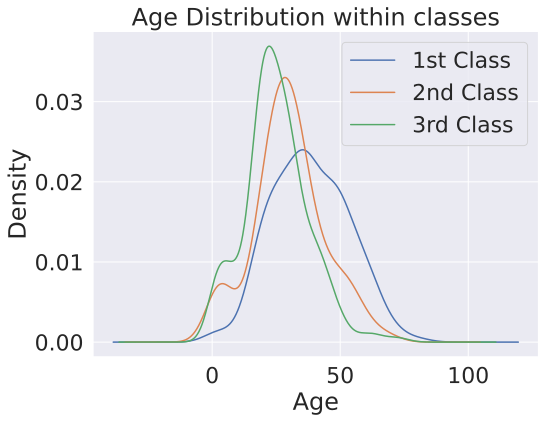

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

plt.show()

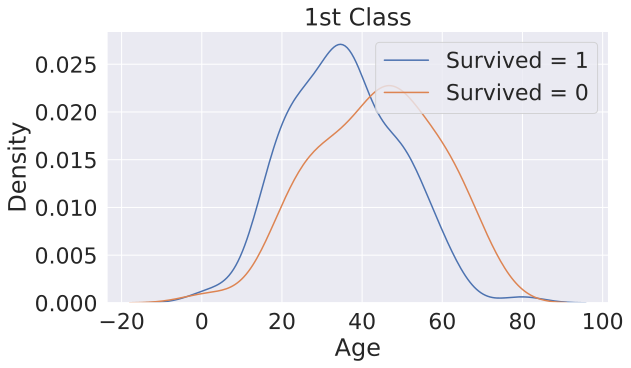

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']== 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.title('1st Class')
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

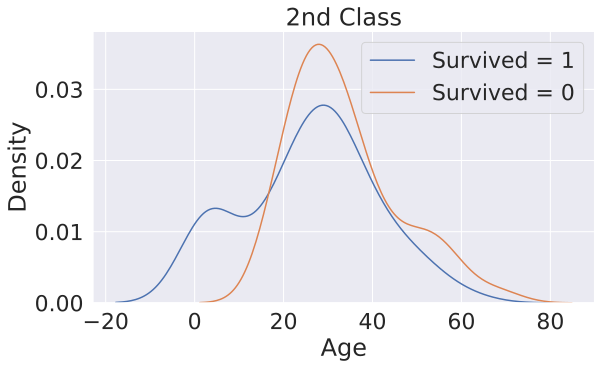

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']== 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.title('2nd Class')
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

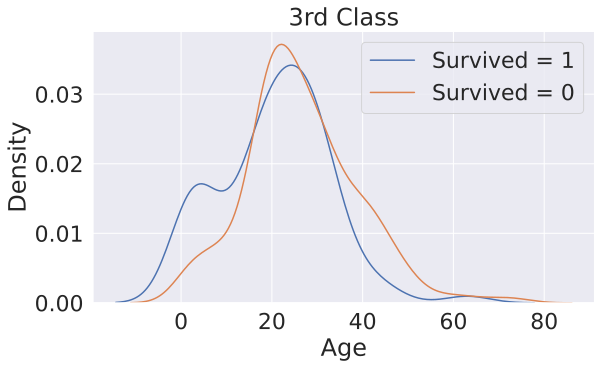

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']== 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.title('3rd Class')
plt.legend(['Survived = 1', 'Survived = 0'])
plt.show()

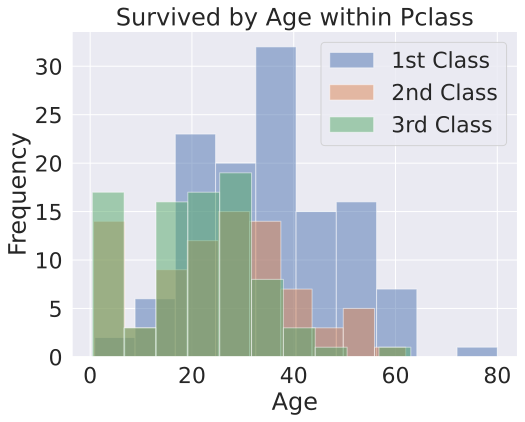

In [ ]:
plt.figure(figsize=(8,6))
df_train['Age'][(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].plot(kind='hist', alpha=.5)
df_train['Age'][(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)].plot(kind='hist', alpha=.5)
df_train['Age'][(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)].plot(kind='hist', alpha=.5)

plt.xlabel('Age')
plt.title('Survived by Age within Pclass')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

plt.show()

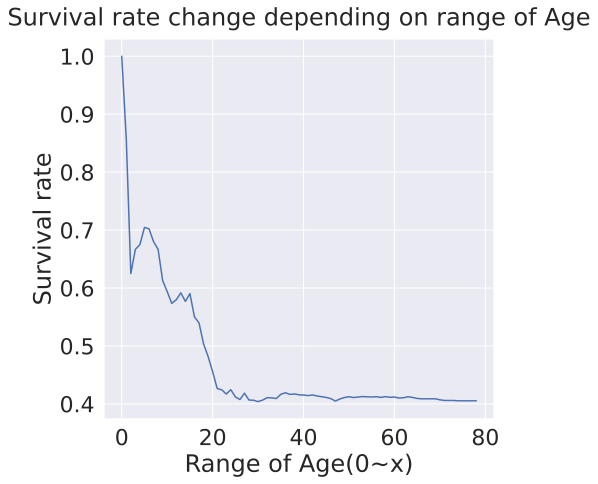

In [ ]:
change_ange_range_survival_ratio = []
for i in range(1, 80 ):
  change_ange_range_survival_ratio.append(df_train[df_train['Age']< i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))


plt.figure(figsize=(7,7))
plt.plot(change_ange_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y= 1.02)
plt.ylabel("Survival rate")
plt.xlabel('Range of Age(0~x)')
plt.show()

##Pclass, Sex, Age

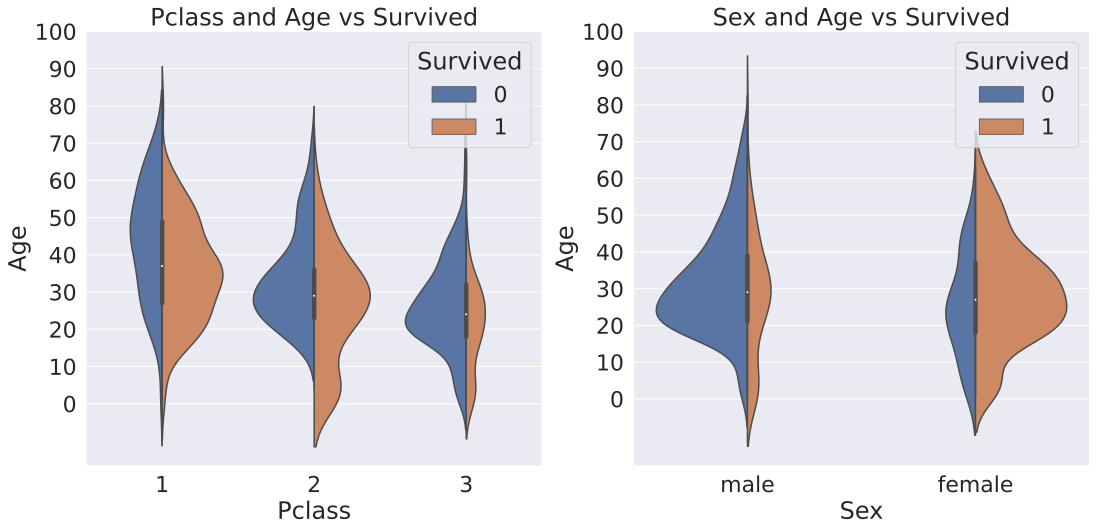

In [ ]:
f, ax= plt.subplots(1,2,figsize=(18,8))
sns.violinplot(data=df_train, x='Pclass', y='Age', scale='count', split=True, ax=ax[0], hue='Survived')
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

##Embarked

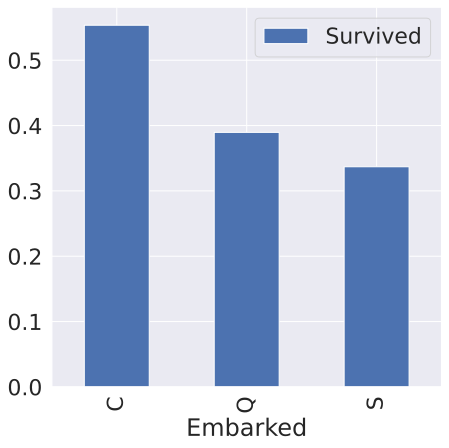

In [ ]:
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', "Survived"]].groupby(['Embarked'], as_index=True).mean().sort_values(by="Survived", ascending=False).plot.bar(ax=ax)

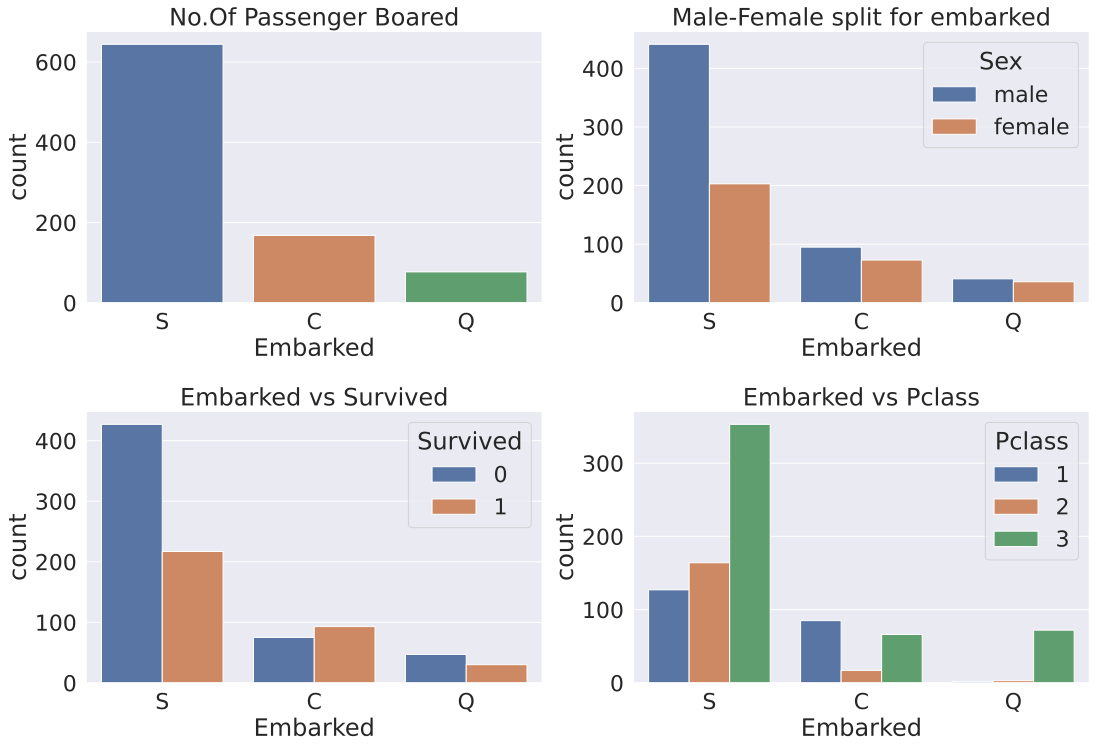

In [ ]:
f, ax = plt.subplots(2,2, figsize=(18,12))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('No.Of Passenger Boared')

sns.countplot(x='Embarked', data=df_train, ax=ax[0,1], hue='Sex')
ax[0,1].set_title('Male-Female split for embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title("Embarked vs Survived")

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title("Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

##Family - SibSp + Parch

In [458]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [412]:
print("Maximum size of Family : ", df_train['FamilySize'].max())
print("Minimum size of Family : ", df_train['FamilySize'].min())

Maximum size of Family :  11
Minimum size of Family :  1


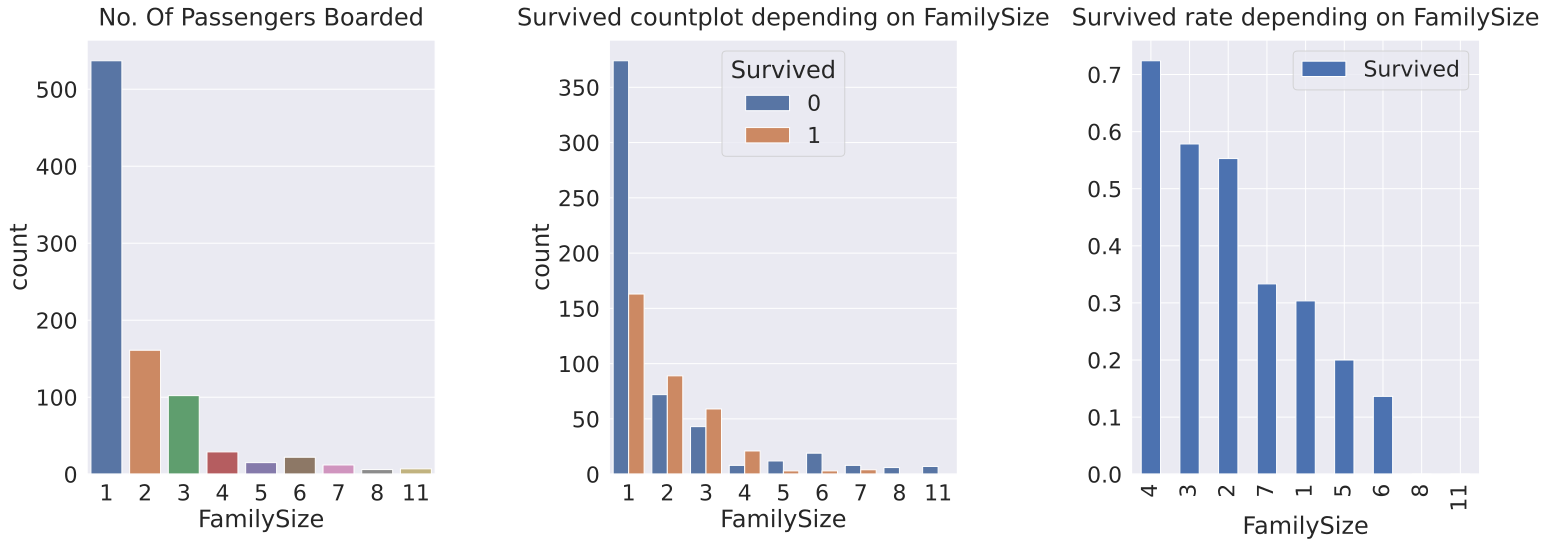

In [413]:
f, ax = plt.subplots(1,3, figsize=(25, 8))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title("No. Of Passengers Boarded", y=1.02)

sns.countplot(x='FamilySize', data=df_train, hue='Survived', ax=ax[1])
ax[1].set_title("Survived countplot depending on FamilySize", y=1.02)

df_train[['FamilySize', "Survived"]].groupby(["FamilySize"]).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title("Survived rate depending on FamilySize", y=1.02)

plt.subplots_adjust(wspace=0.5)
plt.show()

##Fare

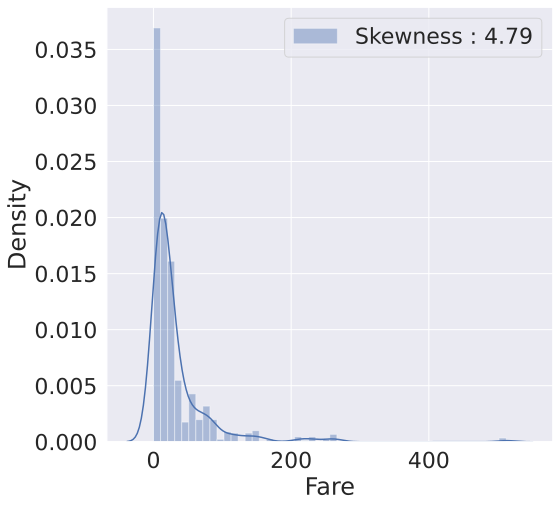

In [459]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.distplot(df_train["Fare"], color='b', label='Skewness : {:.2f}'. format(df_train['Fare'].skew()), ax=ax)
plt.legend(loc='best')

In [460]:
df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

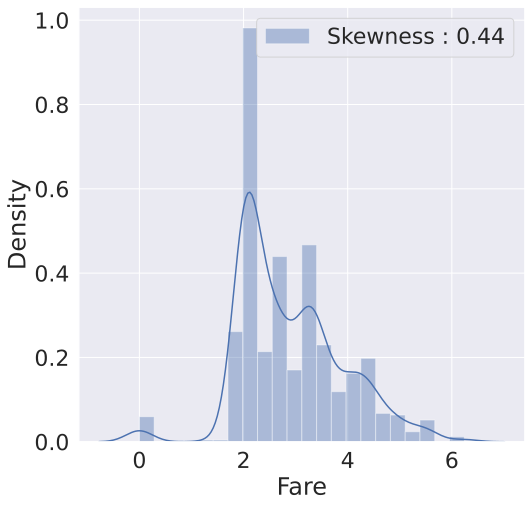

In [461]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
sns.distplot(df_train["Fare"], color='b', label='Skewness : {:.2f}'. format(df_train['Fare'].skew()), ax=ax)
plt.legend(loc='best')

#Feature engineering

##Name

In [462]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')


In [463]:
print(df_train['Initial'].unique())
pd.crosstab(index=df_train['Initial'], columns=df_train['Sex']).T.style.background_gradient(cmap='summer_r')


['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [464]:
print(df_test['Initial'].unique())
pd.crosstab(index=df_test['Initial'], columns=df_test['Sex']).T.style.background_gradient(cmap='summer_r')


['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


Initial,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [465]:
df_train['Initial'] = df_train['Initial'].replace(['Mlle', 'Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss', 'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'])

df_test['Initial'] = df_test['Initial'].replace(['Mlle', 'Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                            ['Miss', 'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'])


In [466]:
print(df_train['Initial'].unique())
pd.crosstab(index=df_train['Initial'], columns=df_train['Sex']).T.style.background_gradient(cmap='summer_r')

['Mr' 'Mrs' 'Miss' 'Master' 'Other']


Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [467]:
print(df_test['Initial'].unique())
pd.crosstab(index=df_test['Initial'], columns=df_test['Sex']).T.style.background_gradient(cmap='summer_r')


['Mr' 'Mrs' 'Miss' 'Master' 'Other']


Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,79,1,72,0
male,21,0,241,0,4


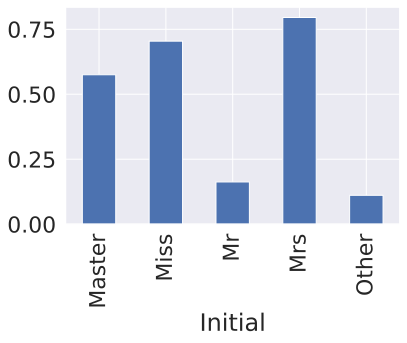

In [468]:
df_train.groupby(['Initial'])['Survived'].mean().plot.bar()

In [469]:
df_all = pd.concat([df_train, df_test], ignore_index=True)

In [470]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,658.852459,0.575000,2.655738,5.482642,2.049180,1.377049,3.262225,4.426230
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,3.065227,2.147170
Mr,658.831388,0.162571,2.359274,32.556397,0.286641,0.159533,2.676067,1.446174
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,3.488188,2.482412
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,2.951897,1.384615


In [471]:
df_train.loc[(df_train["Age"].isnull()) & (df_train['Initial'] == "Mr"), "Age"] = 33
df_train.loc[(df_train["Age"].isnull()) & (df_train['Initial'] == "Mrs"), "Age"] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == "Master"),'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == "Miss"), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] ==  "Other"), 'Age'] = 45

df_test.loc[(df_test["Age"].isnull()) & (df_test['Initial'] == "Mr"), "Age"] = 33
df_test.loc[(df_test["Age"].isnull()) & (df_test['Initial'] == "Mrs"), "Age"] = 37
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == "Master"), 'Age'] = 5
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] == "Miss"), 'Age'] = 22
df_test.loc[(df_test['Age'].isnull()) & (df_test['Initial'] ==  "Other"), 'Age'] = 45

##Emabarked

In [472]:
df_train['Embarked'].isnull().sum()

2

In [473]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [474]:
df_train['Embarked'].isnull().sum()

0

##Age

In [475]:
df_train['Age_cat'] = 0
df_test['Age_cat'] = 0
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [476]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train["Age"]) & (df_train['Age'] < 30), "Age_cat"] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), "Age_cat"] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), "Age_cat"] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), "Age_cat"] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), "Age_cat"] = 6
df_train.loc[70 <= df_train['Age'], "Age_cat"] = 7

df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test["Age"]) & (df_test['Age'] < 30), "Age_cat"] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), "Age_cat"] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), "Age_cat"] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), "Age_cat"] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), "Age_cat"] = 6
df_test.loc[70 <= df_test['Age'], "Age_cat"] = 7

In [477]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [478]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.057860,NaN,Q,1,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,1.945910,NaN,S,2,Mrs,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.270836,NaN,Q,1,Mr,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.159003,NaN,S,1,Mr,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.508582,NaN,S,3,Mrs,2


In [479]:
def catogory_age(x):
  if x < 10:
    return 0
  elif x < 20:
    return 1
  elif x < 30:
    return 2
  elif x < 40:
    return 3
  elif x < 50:
    return 4
  elif x < 60:
    return 5
  elif x < 70:
    return 6
  else:
    return 7

In [480]:
df_train['Age_cat2'] = df_train['Age'].apply(catogory_age)

In [481]:
(df_train['Age_cat'] == df_train['Age_cat2']).all()

True

In [482]:
df_train = df_train.drop(['Age',"Age_cat2"], axis=1)
df_test = df_test.drop(['Age'], axis=1)

##문자 데이터를 숫자 데이터로 변환


###Initial

In [483]:
df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [484]:
df_train['Initial'] = df_train['Initial'].map({"Master" : 0,
                         "Miss" : 1,
                         "Mr" : 2,
                         "Mrs" : 3,
                         "Other" : 4})

df_test['Initial'] = df_test['Initial'].map({"Master" : 0,
                         "Miss" : 1,
                         "Mr" : 2,
                         "Mrs" : 3,
                         "Other" : 4})

###Embarked 

In [485]:
df_train['Embarked'] = df_train["Embarked"].map({"C" : 0, "Q" : 1, "S" : 2})
df_test['Embarked'] = df_test["Embarked"].map({"C" : 0, "Q" : 1, "S" : 2})

###Sex

In [486]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [487]:
df_train['Sex'] = df_train['Sex'].map({"male" : 1, "female" : 0})
df_test['Sex'] = df_test['Sex'].map({"male" : 1, "female" : 0})

In [488]:
df_train['Sex'].unique()

array([1, 0])

##상관계수

In [489]:
heatmap_data = df_train[["Survived", "Pclass", "Sex", "Fare","Embarked","FamilySize","Initial","Age_cat"]].astype(float).corr()
heatmap_data.head()

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.085529,-0.095002
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.133054,-0.314809
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.051687,0.122917
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,-0.019889,0.077791
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.026550,-0.033173


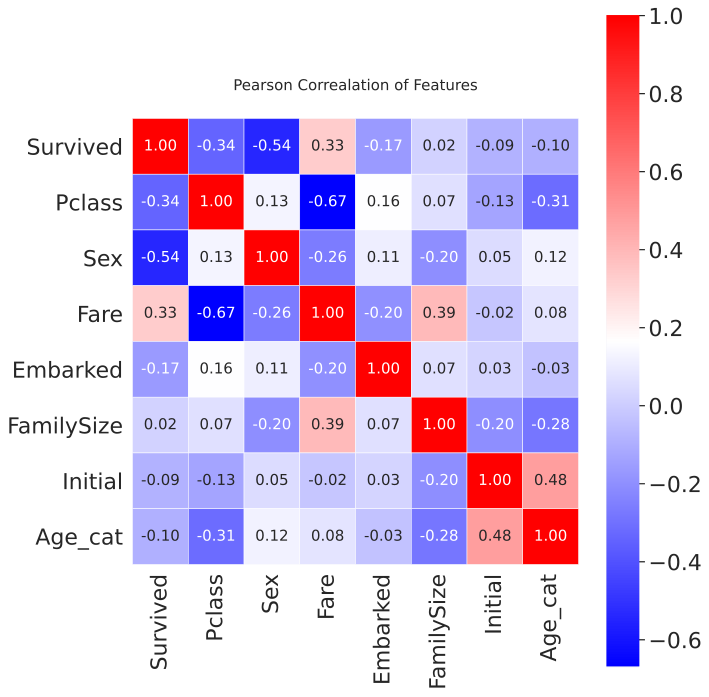

In [490]:
colormap = plt.cm.bwr
plt.figure(figsize=(10,12))
plt.title("Pearson Correalation of Features", y=1.05, size=15)
sns.heatmap(data=heatmap_data,
            linewidths = 0.5, vmax=1.0, square=True ,annot= True, annot_kws={"size" : 15},
            cmap=colormap, linecolor= 'white', fmt =".2f")

##One-hot-Encoding

In [491]:
print(df_train.columns)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Initial',
       'Age_cat'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Initial', 'Age_cat'],
      dtype='object')


In [492]:
df_train = pd.get_dummies(data=df_train, columns=['Initial', "Embarked"], prefix=["Initial", "Embarked"])
df_test = pd.get_dummies(data=df_test, columns=['Initial', "Embarked"], prefix=["Initial", "Embarked"])

In [493]:
print(df_train.columns)
print(df_test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'FamilySize', 'Age_cat', 'Initial_0',
       'Initial_1', 'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0',
       'Embarked_1', 'Embarked_2'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'FamilySize', 'Age_cat', 'Initial_0', 'Initial_1',
       'Initial_2', 'Initial_3', 'Initial_4', 'Embarked_0', 'Embarked_1',
       'Embarked_2'],
      dtype='object')


In [494]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


##Drop Columns
- 사용하지 않는 컬럼 제거하기

In [495]:
df_train = df_train.drop(['PassengerId', 'Name','SibSp','Parch','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['PassengerId', 'Name','SibSp','Parch','Ticket','Cabin'], axis=1)

In [496]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [497]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


In [498]:
#데이터 셋 저장
df_train.to_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/You_Han_Lee_titanic_train.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/Colab Notebooks/DataScience/My CSV/You_Han_Lee_titanic_test.csv', index=False)